In [19]:
import torch 
import math
import matplotlib.pyplot as plt

In [56]:
# True Solution
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x) + torch.cos(x)

p = torch.tensor([1, 2, 3]) # Polynomial order
xx = x.unsqueeze(-1).pow(p) # X vals before weights

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1), # 3 inputs (x, x2, x3), 1 output (y)
    torch.nn.Flatten(0, 1) # Bias? 
)
loss_fn = torch.nn.MSELoss(reduction='sum')

In [57]:
learning_rate = 1e-03
optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)
for t in range(2000):
    y_pred = model(xx)
    
    loss = loss_fn(y_pred, y)
    if t % 100 == 99: 
        print(t, loss.item())
        
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} xx^2 + {linear_layer.weight[:, 2].item()} x^3')

99 19013.31640625
199 8260.53125
299 3274.2158203125
399 1279.2930908203125
499 572.203125
599 336.9365539550781
699 257.4110412597656
799 226.79493713378906
899 211.00376892089844
999 199.51637268066406
1099 189.32354736328125
1199 179.69850158691406
1299 170.5324249267578
1399 161.85227966308594
1499 153.69985961914062
1599 146.10671997070312
1699 139.0907440185547
1799 132.65692138671875
1899 126.79899597167969
1999 121.5011978149414
Result: y = 0.6470862627029419 + 0.7030155062675476 x + -0.20997728407382965 xx^2 + -0.07104998081922531 x^3


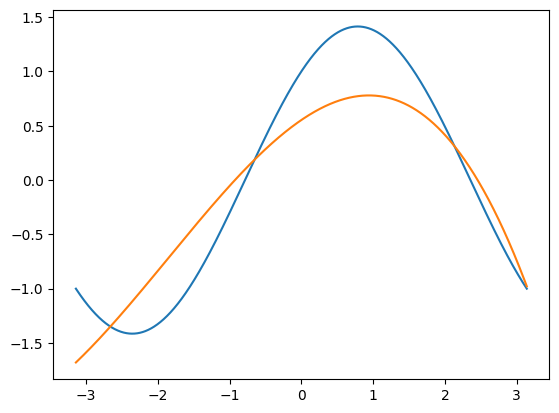

In [54]:
plt.figure()
plt.plot(x, y)
plt.plot(x, y_pred.data.numpy())
plt.show()